# Basic Reprojection Demo
In this notebook we go through a basic example showing how the reprojection can be run

In [1]:
from astropy.io import fits

from reprojection.reproject import calculate_reprojection
from create_test_data import create_test_fits_tiny, create_test_fits
from reprojection.utils import plot_wcs_comparison, compare_images


We use our `create_test_fits` function that creates some fake data with minorly different WCS

In [2]:
source_file, target_file = create_test_fits_tiny()
source_hdu = fits.open(source_file)[0]
target_hdu = fits.open(target_file)[0]

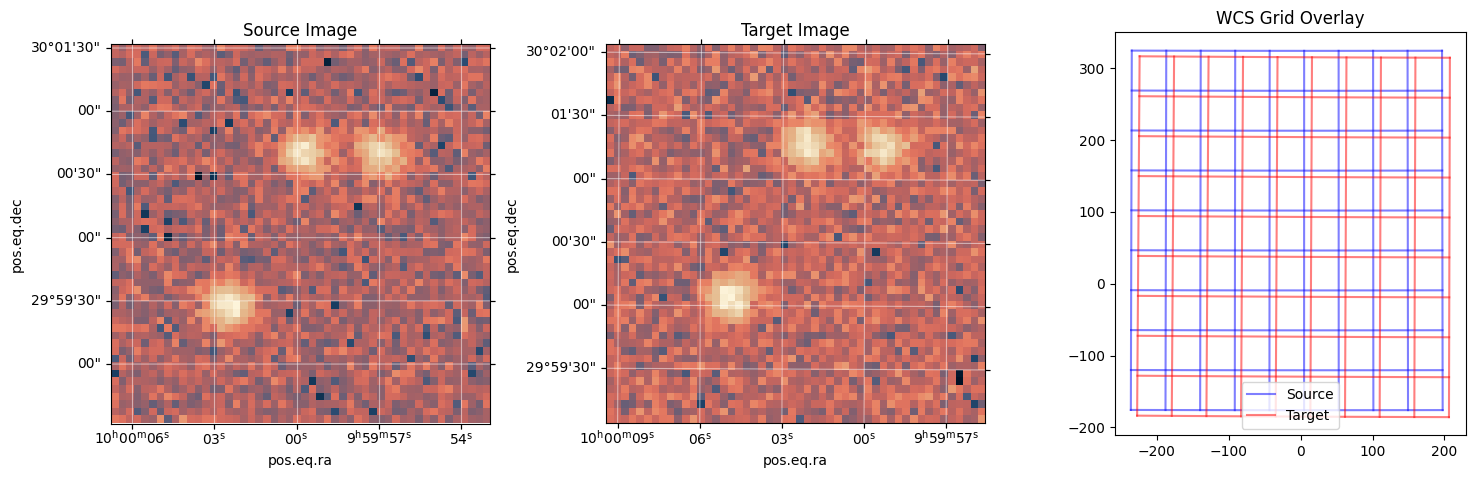

In [3]:
plot_wcs_comparison(source_hdu, target_hdu)

Now we can clearly visualize the image misalignment. Let's go ahead and run our reprojection code.

In [10]:
reprojected_source = calculate_reprojection(source_hdu, target_hdu, interpolation_mode="bicubic")

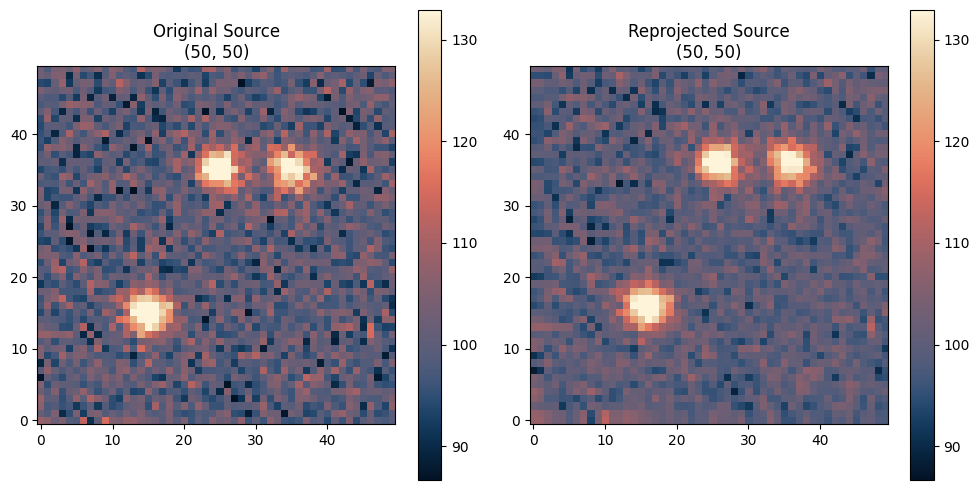

In [11]:
fig = compare_images(source_hdu, reprojected_source)


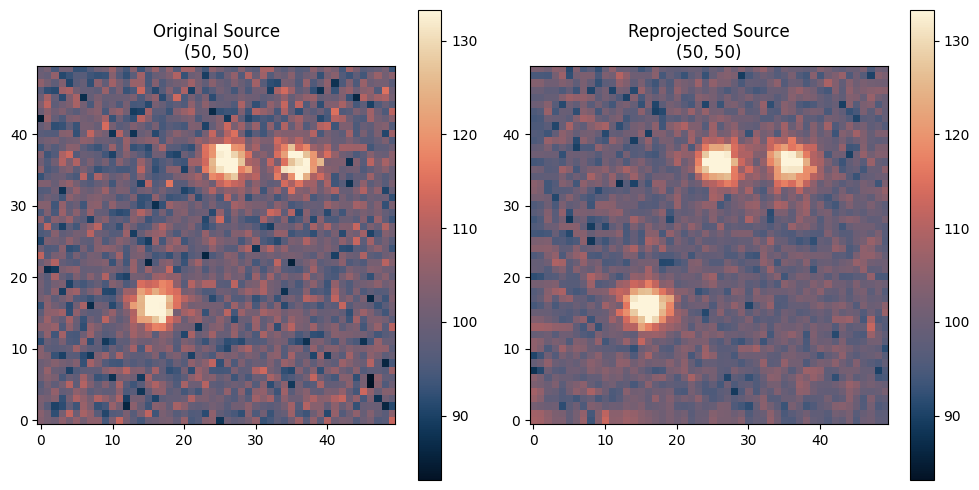

In [9]:
fig = compare_images(target_hdu, reprojected_source)